In [1]:
%cd ..

c:\Users\nakag\c3\pbl-ssc_with_gfootball


In [11]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base_dir = './outputs/2025-06-21/00-31-54'

result_df = pd.read_csv(os.path.join(base_dir, 'results_1459164.csv'))
shoot_df = pd.read_csv(os.path.join(base_dir, 'shoots_1459164.csv'))

In [4]:
result_df

,frame_id,chance_team,winner,shoots,step_count,n_iter,n_sub_iter
0,1459164,Away,Draw,0,201,1,1
1,1459164,Away,Draw,0,114,1,2
2,1459164,Away,Away,0,33,1,3
3,1459164,Away,Draw,0,89,1,4
4,1459164,Away,Draw,6,24,1,5
...,...,...,...,...,...,...,...
95,1459164,Away,Draw,3,201,10,6
96,1459164,Away,Draw,0,66,10,7
97,1459164,Away,Draw,0,201,10,8
98,1459164,Away,Draw,6,109,10,9


In [5]:
shoot_df

,frame_id,n_iter,n_sub_iter,shoot_x,shoot_y,shoot_direction_x,shoot_direction_y,ball_owned_team,ball_owned_player
0,1459164,1,5,-0.573170,-0.170034,-0.010430,0.004440,1,7
1,1459164,1,5,-0.583511,-0.165631,-0.010221,0.004352,1,7
2,1459164,1,5,-0.593247,-0.161485,-0.009495,0.004044,1,7
3,1459164,1,5,-0.602474,-0.157556,-0.009015,0.003839,1,7
4,1459164,1,5,-0.611217,-0.153832,-0.008523,0.003630,1,7
...,...,...,...,...,...,...,...,...,...
183,1459164,10,9,-0.585362,-0.164617,-0.009938,0.004369,1,7
184,1459164,10,9,-0.594872,-0.160435,-0.009309,0.004093,1,7
185,1459164,10,9,-0.603911,-0.156462,-0.008823,0.003879,1,7
186,1459164,10,9,-0.612470,-0.152699,-0.008343,0.003668,1,7


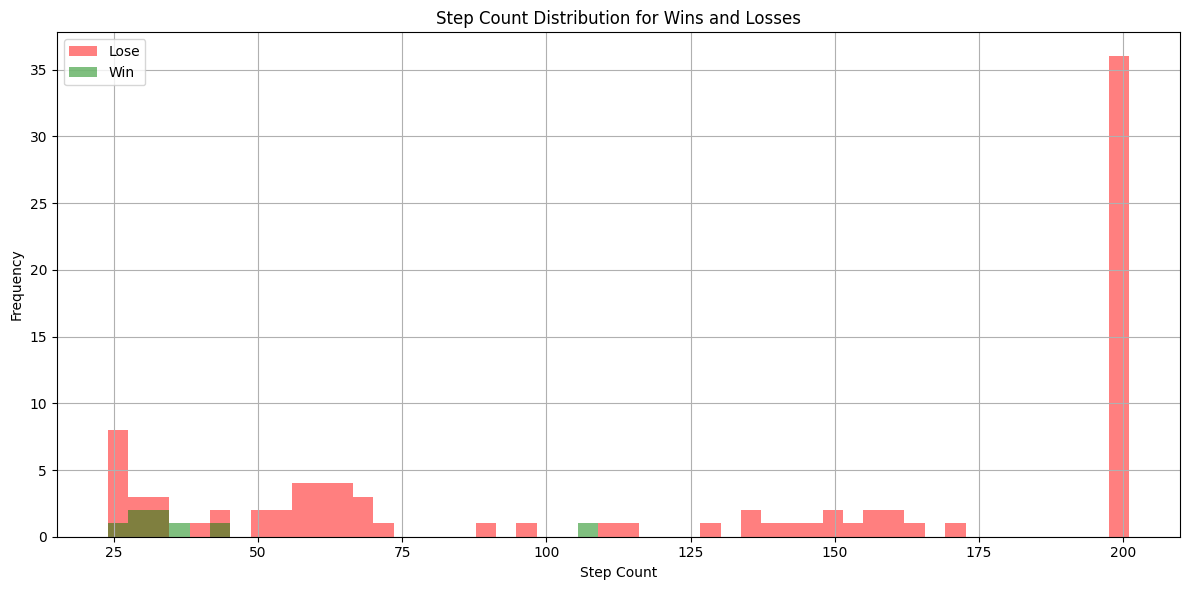

In [16]:
result_df['is_win'] = result_df['chance_team'] == result_df['winner']

min_step = result_df['step_count'].min()
max_step = result_df['step_count'].max()

# 共通のビンの境界を生成
n_bins = 50
common_bins = np.linspace(min_step, max_step, n_bins + 1) # ビン数+1の値を指定

fig, ax = plt.subplots(figsize=(12, 6))

# Loseのヒストグラム
result_df.loc[~result_df['is_win'], 'step_count'].hist(
    bins=common_bins, ax=ax, alpha=0.5, label='Lose', color='red'
)

# Winのヒストグラム
result_df.loc[result_df['is_win'], 'step_count'].hist(
    bins=common_bins, ax=ax, alpha=0.5, label='Win', color='green'
)

ax.set_title('Step Count Distribution for Wins and Losses')
ax.set_xlabel('Step Count')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

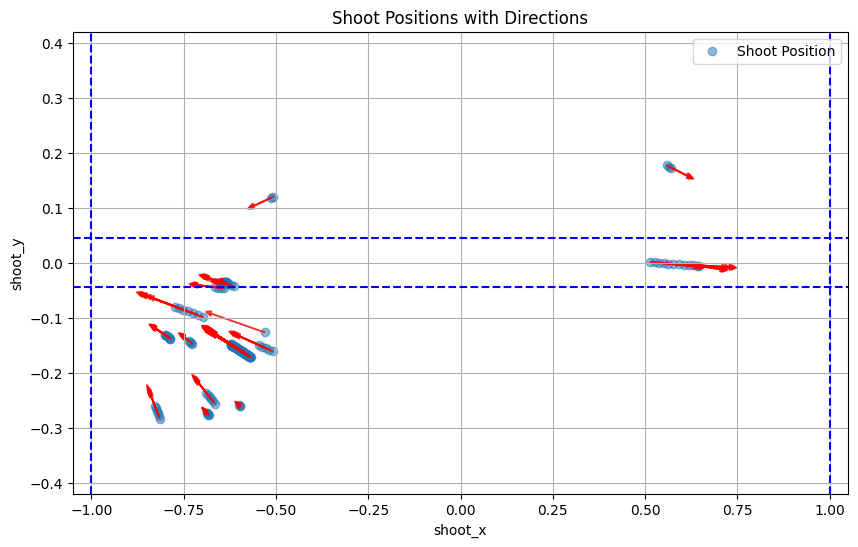

In [6]:
scale_factor = 10 # 矢印の長さを調整する係数
plt.figure(figsize=(10, 6))

# 散布図のプロット
plt.scatter(shoot_df['shoot_x'], shoot_df['shoot_y'], alpha=0.5, label='Shoot Position')

# 各点に対して方向を示す矢印を追加
for i, row in shoot_df.iterrows():
    x = row['shoot_x']
    y = row['shoot_y']
    dx = row['shoot_direction_x']
    dy = row['shoot_direction_y']

    plt.arrow(x, y, dx * scale_factor, dy * scale_factor,
              head_width=0.01, head_length=0.015, fc='red', ec='red',
              length_includes_head=True, alpha=0.7)

# ゴールはx = -1,1 -0.044 < y < 0.044
plt.axvline(x=-1, color='blue', linestyle='--')
plt.axvline(x=1, color='blue', linestyle='--')
plt.axhline(y=0.044, color='blue', linestyle='--')
plt.axhline(y=-0.044, color='blue', linestyle='--')

plt.xlabel('shoot_x')
plt.ylabel('shoot_y')
plt.xlim(-1.05, 1.05)
plt.ylim(-0.42, 0.42)
plt.title('Shoot Positions with Directions')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

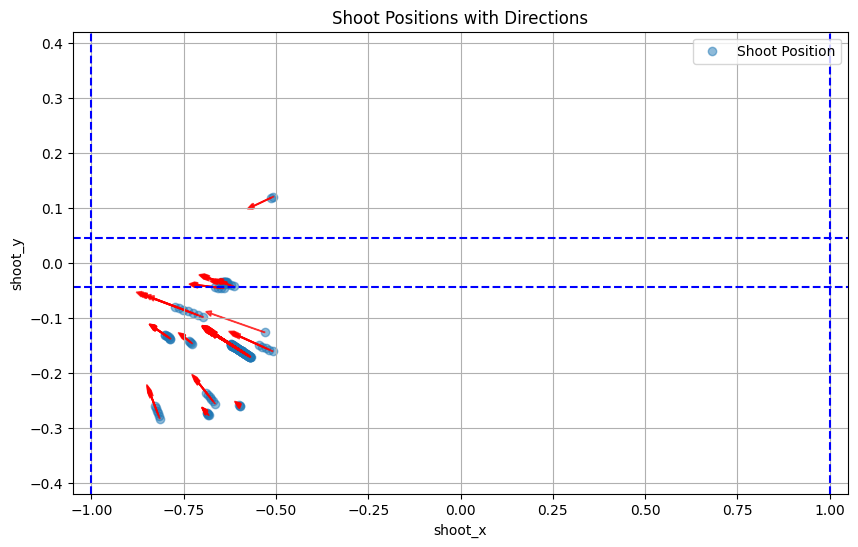

In [7]:
shoot_df = shoot_df.loc[shoot_df['shoot_x'] < 0]

scale_factor = 10 # 矢印の長さを調整する係数
plt.figure(figsize=(10, 6))

# 散布図のプロット
plt.scatter(shoot_df['shoot_x'], shoot_df['shoot_y'], alpha=0.5, label='Shoot Position')

# 各点に対して方向を示す矢印を追加
for i, row in shoot_df.iterrows():
    x = row['shoot_x']
    y = row['shoot_y']
    dx = row['shoot_direction_x']
    dy = row['shoot_direction_y']

    plt.arrow(x, y, dx * scale_factor, dy * scale_factor,
              head_width=0.01, head_length=0.015, fc='red', ec='red',
              length_includes_head=True, alpha=0.7)

# ゴールはx = -1,1 -0.044 < y < 0.044
plt.axvline(x=-1, color='blue', linestyle='--')
plt.axvline(x=1, color='blue', linestyle='--')
plt.axhline(y=0.044, color='blue', linestyle='--')
plt.axhline(y=-0.044, color='blue', linestyle='--')

plt.xlabel('shoot_x')
plt.ylabel('shoot_y')
plt.xlim(-1.05, 1.05)
plt.ylim(-0.42, 0.42)
plt.title('Shoot Positions with Directions')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [8]:
shoot_integrated_for_df = list()
for (n_iter, n_sub_iter), group in shoot_df.groupby(['n_iter', 'n_sub_iter']):
    shoot_integrated_for_df.append({
        'n_iter': n_iter,
        'n_sub_iter': n_sub_iter,
    })

shoot_integrated_df = pd.DataFrame(shoot_integrated_for_df)
shoot_integrated_df['is_shoot'] = True
shoot_integrated_df

,n_iter,n_sub_iter,is_shoot
0,1,5,True
1,1,9,True
2,2,3,True
3,2,6,True
4,3,2,True
5,3,6,True
6,3,7,True
7,3,9,True
8,4,4,True
9,4,5,True


In [9]:
result_df = result_df.merge(shoot_integrated_df, on=['n_iter', 'n_sub_iter'], how='left')
result_df['is_shoot'] = result_df['is_shoot'].fillna(False)
result_df

C:\Users\nakag\AppData\Local\Temp\ipykernel_2636\2421903654.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df['is_shoot'] = result_df['is_shoot'].fillna(False)


,frame_id,chance_team,winner,shoots,step_count,n_iter,n_sub_iter,is_shoot
0,1459164,Away,Draw,0,201,1,1,False
1,1459164,Away,Draw,0,114,1,2,False
2,1459164,Away,Away,0,33,1,3,False
3,1459164,Away,Draw,0,89,1,4,False
4,1459164,Away,Draw,6,24,1,5,True
...,...,...,...,...,...,...,...,...
95,1459164,Away,Draw,3,201,10,6,False
96,1459164,Away,Draw,0,66,10,7,False
97,1459164,Away,Draw,0,201,10,8,False
98,1459164,Away,Draw,6,109,10,9,True


In [ ]:
output_for_df = list()
for n_iter, group in result_df.groupby('n_iter'):
    win_ratio = group['is_win'].mean()
    shoot_ratio = group['is_shoot'].mean()
    output_for_df.append({
        'n_iter': n_iter,
        'shoot_ratio': shoot_ratio,
        'win_ratio': win_ratio,
    })
output_df = pd.DataFrame(output_for_df)
output_df['exam_id'] = 1459164
output_df

,n_iter,shoot_ratio,win_ratio,exam_id
0,1,0.2,0.1,1459164
1,2,0.2,0.0,1459164
2,3,0.4,0.2,1459164
3,4,0.4,0.1,1459164
4,5,0.6,0.1,1459164
5,6,0.5,0.0,1459164
6,7,0.1,0.0,1459164
7,8,0.3,0.1,1459164
8,9,0.4,0.1,1459164
9,10,0.2,0.1,1459164


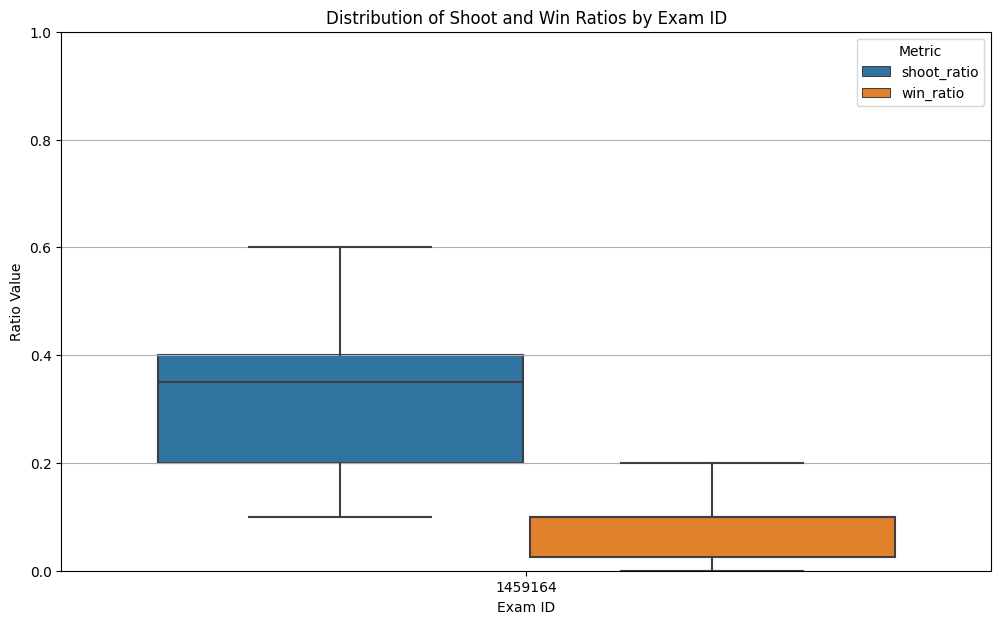

In [11]:
import seaborn as sns

df = output_df.copy()
df_melted = df.melt(id_vars=['n_iter', 'exam_id'], value_vars=['shoot_ratio', 'win_ratio'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 7))
sns.boxplot(x='exam_id', y='value', hue='metric', data=df_melted)
plt.title('Distribution of Shoot and Win Ratios by Exam ID')
plt.xlabel('Exam ID')
plt.ylabel('Ratio Value')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Metric')
# plt.tight_layout()
plt.show()

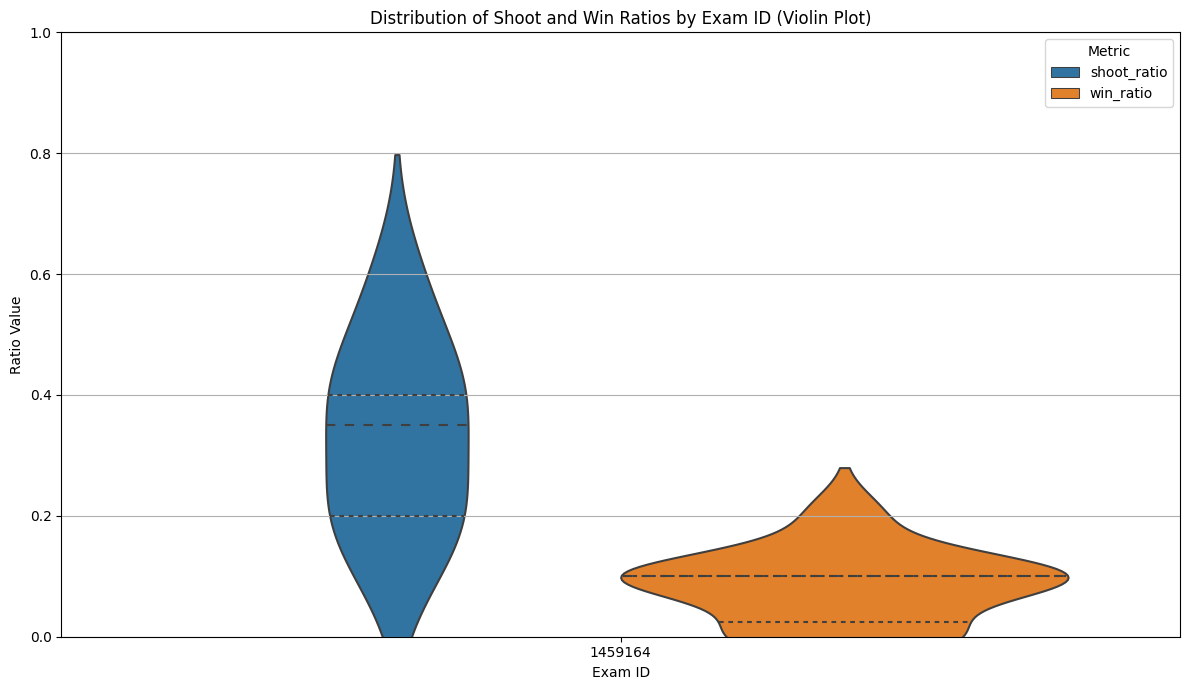

In [12]:
df_melted = df.melt(id_vars=['n_iter', 'exam_id'], value_vars=['shoot_ratio', 'win_ratio'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 7))

# sns.violinplotを使用してバイオリンプロットを作成
# split=Trueは、hueのカテゴリが2つである場合に、片側のバイオリンとして表示することでスペースを節約する
sns.violinplot(x='exam_id', y='value', hue='metric', data=df_melted, split=False, inner='quartile')

plt.title('Distribution of Shoot and Win Ratios by Exam ID (Violin Plot)')
plt.xlabel('Exam ID')
plt.ylabel('Ratio Value')
plt.ylim(0, 1) # Y軸の範囲を0から1に設定
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()